<a href="https://colab.research.google.com/github/Anan-2003/Portfolio_Optimization/blob/main/Portfolio_Optimization().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portfolio Optimization


> This project aims to optimize a portfolio of stocks using the Modern Portfolio theory (MPT) and the Sharpe ratio. We use historical stock data obtained from Yahoo Finance and generate random portfolios using Monte Carlo Stimulation where we calculate the return, risk and sharpe ratio for each portfolio and generate a return-risk graph representing a Markovitz Bullet.



Importing necessary libraries:

In [1]:
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import yfinance as yf

Matplotlib is building the font cache; this may take a moment.


Collecting the stock data:

In [2]:
# Set the plot style to 'ggplot'
style.use('ggplot')
# Override pandas datareader module from yfinance
yf.pdr_override()

# Define a list of stock tickers
tickers= ['HDFCBANK.NS','INFY.NS','BERGEPAINT.NS','CIPLA.NS','JETAIRWAYS.NS']
# Set the start and end dates for the historical stock data
start=dt.datetime(2012,1,1)
end=dt.datetime(2022,1,1)
#Set number of stimulations
number_of_simulations=10000
# Set the risk-free rate (RF) to 0
RF=0

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


Sanity Checking the data:

In [3]:
pdr.get_data_yahoo(tickers[0], start, end)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,214.449997,214.899994,209.750000,213.425003,192.628967,3514998
2012-01-03,215.699997,220.449997,215.000000,219.574997,198.179672,3439238
2012-01-04,220.949997,222.475006,215.425003,221.649994,200.052505,4871478
2012-01-05,222.000000,223.350006,220.149994,221.824997,200.210464,3380606
2012-01-06,220.500000,228.574997,219.475006,226.649994,204.565323,3977222
...,...,...,...,...,...,...
2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1398.764771,2352549
2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1408.406006,2725339
2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1401.705322,3834351


Calculating % change of adjusted close prices:

In [4]:
returns=pd.DataFrame() # Create an empty DataFrame to store the returns

# Iterate through each ticker in the tickers list
for ticker in tickers:
  # Retrieve historical stock data for the current ticker from Yahoo Finance
  stock_data=pdr.get_data_yahoo(ticker, start=start, end=end)
  # Calculate the percentage change in the adjusted close price of the stock
  returns[ticker] = stock_data['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
returns = returns.drop(returns.index[0], axis=0)
returns

,HDFCBANK.NS,INFY.NS,BERGEPAINT.NS,CIPLA.NS,JETAIRWAYS.NS
Date,,,,,
2012-01-03,0.028816,0.019705,0.019231,0.022447,0.025752
2012-01-04,0.009450,-0.003456,0.016009,0.008843,-0.010719
2012-01-05,0.000790,-0.004993,-0.008441,0.012544,0.001711
2012-01-06,0.021751,-0.002817,0.017026,0.010298,0.002562
2012-01-09,0.005294,0.001553,0.011161,0.018319,0.053095
...,...,...,...,...,...
2021-12-27,0.008270,0.001422,0.007221,0.024166,-0.006197
2021-12-28,0.006893,0.011709,0.008509,0.003279,0.010204
2021-12-29,-0.004758,-0.001298,-0.000532,0.002411,-0.007856


Calculating Return, Risk & Sharpe ratio:

In [7]:
portfolio_returns = []  # List to store portfolio returns
portfolio_risks = []  # List to store portfolio risks
sharpe_ratios = []  # List to store Sharpe ratios
portfolio_weights = []  # List to store portfolio weights

simulation_results = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe'])
# Create an empty DataFrame to store simulation results with columns for Return, Risk, and Sharpe

for portfolio in range(number_of_simulations):
    # Assign weights to each stock randomly
    weights = np.random.random_sample(len(tickers))
    weights = np.round(weights / np.sum(weights), 5)  # Normalize the weights to sum up to 1
    portfolio_weights.append(weights)  # Store the portfolio weights

    # Calculate the return and risk of each portfolio
    annualized_return = np.sum(returns.mean() * weights) * 252  # Assuming 252 trading days in a year
    matrix_covariance = returns.cov() * 252  # Calculate the covariance matrix of returns
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))  # Calculate portfolio variance
    portfolio_standard_deviation = np.sqrt(portfolio_variance)  # Calculate portfolio standard deviation (risk)

    # Calculate Sharpe Ratio
    sharpe_ratio = (annualized_return - RF) / portfolio_standard_deviation

    # Append the calculated values to respective lists
    portfolio_returns.append(annualized_return)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratios.append(sharpe_ratio)

    # Add the simulation results to the DataFrame
    new_row = pd.DataFrame({'Return': [annualized_return],
                            'Risk': [portfolio_standard_deviation],
                            'Sharpe': [sharpe_ratio]})
    simulation_results = pd.concat([simulation_results, new_row], ignore_index=True)



C:\Users\aarav chanani\AppData\Local\Temp\ipykernel_20116\3543413299.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_results = pd.concat([simulation_results, new_row], ignore_index=True)


Plotting the return-risk graph:

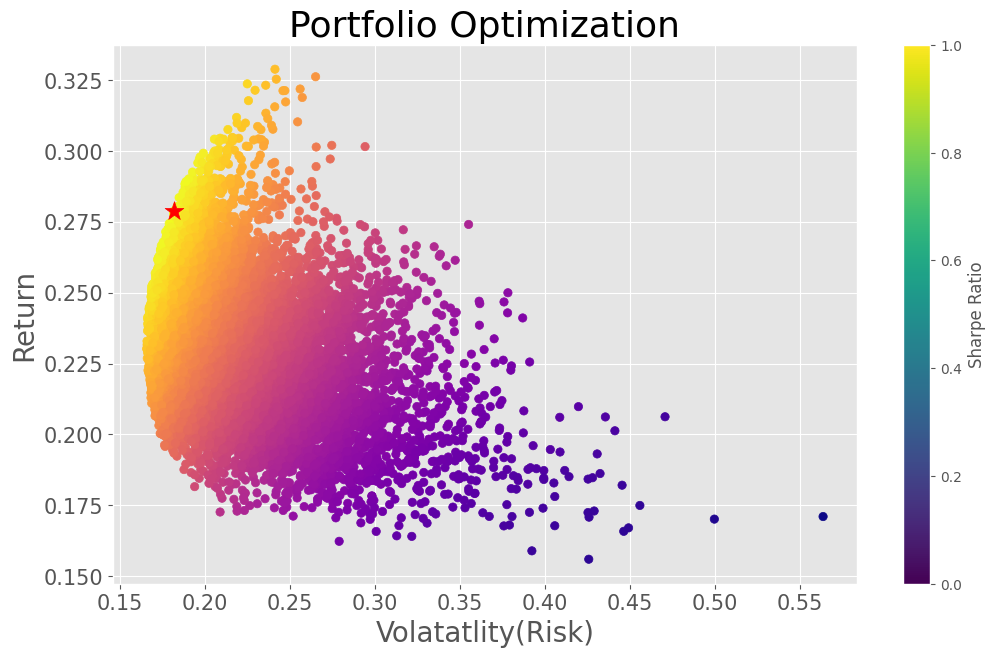

In [8]:
plt.figure(figsize=(12,7))
# print(portfolio_risks.shape, portfolio_returns.shape)
plt.scatter(simulation_results['Risk'], simulation_results['Return'], c=simulation_results['Sharpe'], cmap='plasma')
plt.title('Portfolio Optimization',fontsize=26)
plt.xlabel('Volatatlity(Risk)',fontsize=20)
plt.ylabel('Return',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Highlight the portfolio with the maximum Sharpe ratio
max_sharpe_index = simulation_results['Sharpe'].idxmax()
plt.scatter(simulation_results.loc[max_sharpe_index, 'Risk'], simulation_results.loc[max_sharpe_index, 'Return'], color='red', marker='*', s=200, label='Max Sharpe')

#Plot the graph
plt.colorbar(label='Sharpe Ratio')
plt.style.use('dark_background')
plt.show()